## 1. Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use("seaborn-v0_8-whitegrid")

## 2. Load Dataset

In [30]:
heart_disease_df = pd.read_csv("../data/heart_disease_df_1.csv")

# Show first rows
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0
2,70,1,0.0,145,174.0,0,1.0,125,1,NaN,0,0,3,0
3,61,1,0.0,148,203.0,0,1.0,161,0,NaN,2,1,3,0
4,62,0,0.0,138,294.0,1,1.0,106,0,NaN,1,3,2,0


## 3. Basic Information

In [31]:
print("Shape:", heart_disease_df.shape)
print("\nInfo:")
print(heart_disease_df.info())
print("\nMissing Values:")
print(heart_disease_df.isna().sum())

Shape: (1076, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thalach   1076 non-null   int64  
 8   exang     1076 non-null   int64  
 9   oldpeak   0 non-null      float64
 10  slope     1076 non-null   int64  
 11  ca        1076 non-null   int64  
 12  thal      1076 non-null   int64  
 13  target    1076 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 117.8 KB
None

Missing Values:
age            0
sex            0
cp            53
trestbps       0
chol          55
fbs            0
restecg       48
thalach        0
exang          0
oldpeak     1076

## 4. Statistical Summary

In [32]:
heart_disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1076.0,54.548327,9.002247,29.0,48.0,56.0,61.0,77.0
sex,1076.0,0.690520,0.462494,0.0,0.0,1.0,1.0,1.0
cp,1023.0,0.947214,1.024719,0.0,0.0,1.0,2.0,3.0
trestbps,1076.0,131.752788,17.471844,94.0,120.0,130.0,140.0,200.0
chol,1021.0,245.537708,50.346192,126.0,211.0,240.0,275.0,564.0
fbs,1076.0,0.148699,0.355957,0.0,0.0,0.0,0.0,1.0
restecg,1028.0,0.527237,0.527932,0.0,0.0,1.0,1.0,2.0
thalach,1076.0,149.152416,22.813766,71.0,133.0,152.0,166.0,202.0
exang,1076.0,0.331784,0.471073,0.0,0.0,0.0,1.0,1.0
oldpeak,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Target Distribution

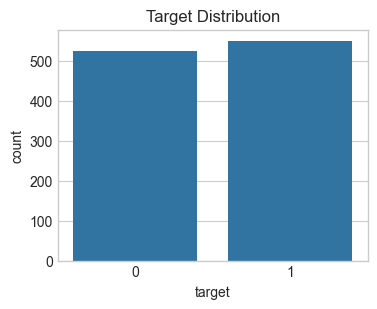

In [41]:
plt.figure(figsize=(4,3))
sns.countplot(data=heart_disease_df, x="target")
plt.title("Target Distribution")
plt.show()

## 6. Numeric Feature Distributions

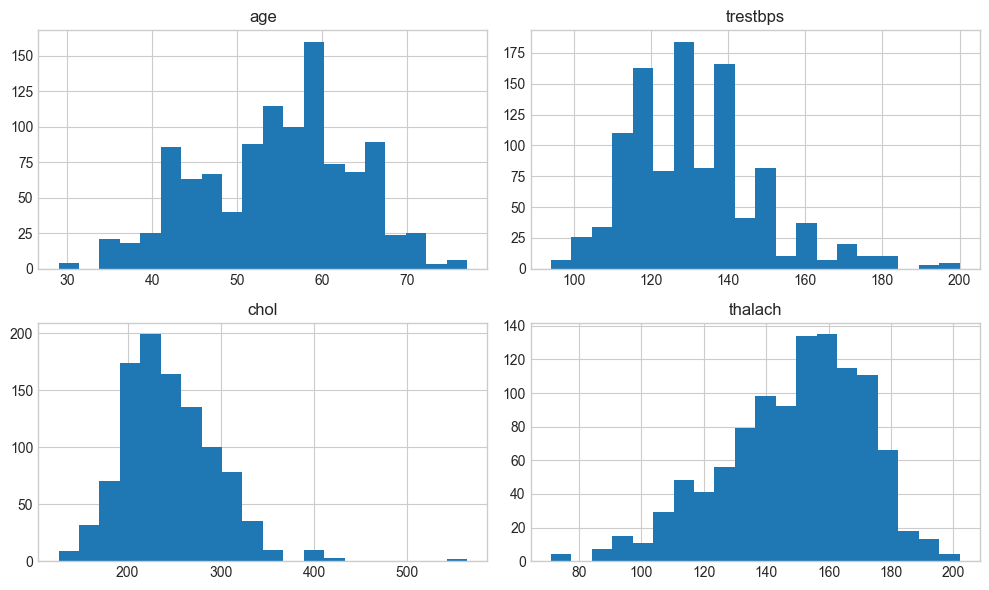

In [42]:
numeric_cols = ["age", "trestbps", "chol", "thalach"]

heart_disease_df[numeric_cols].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

## 7. Correlation Matrix

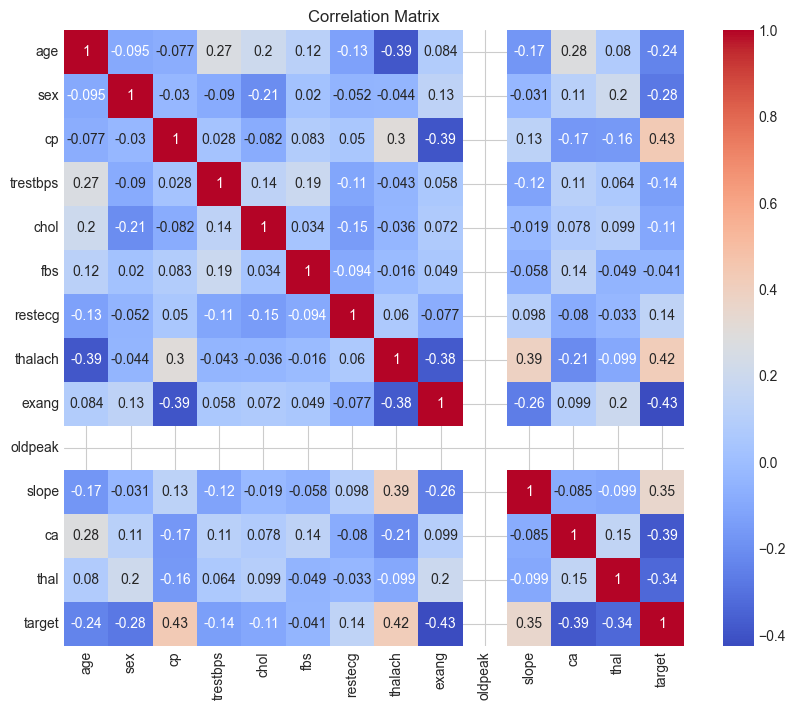

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_disease_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 8. Boxplots to Detect Outliers

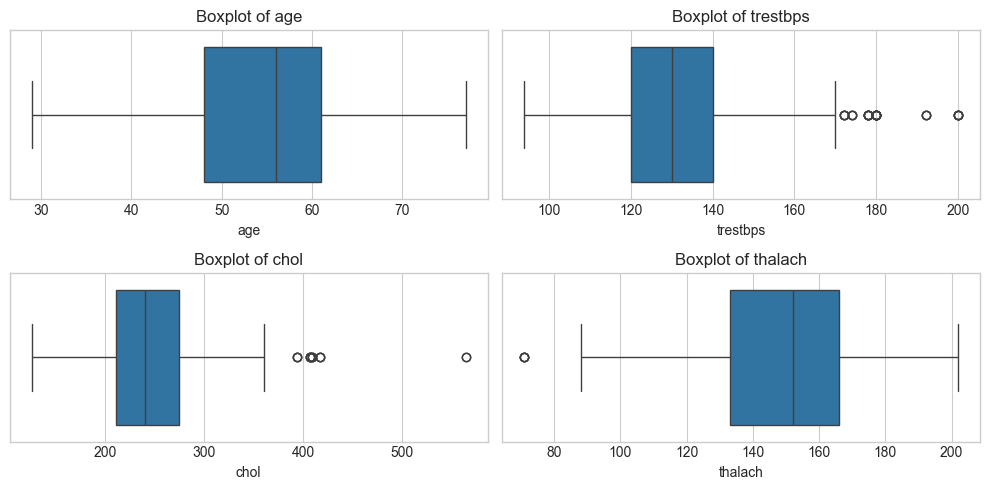

In [44]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=heart_disease_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## 9. Categorical Feature Distributions

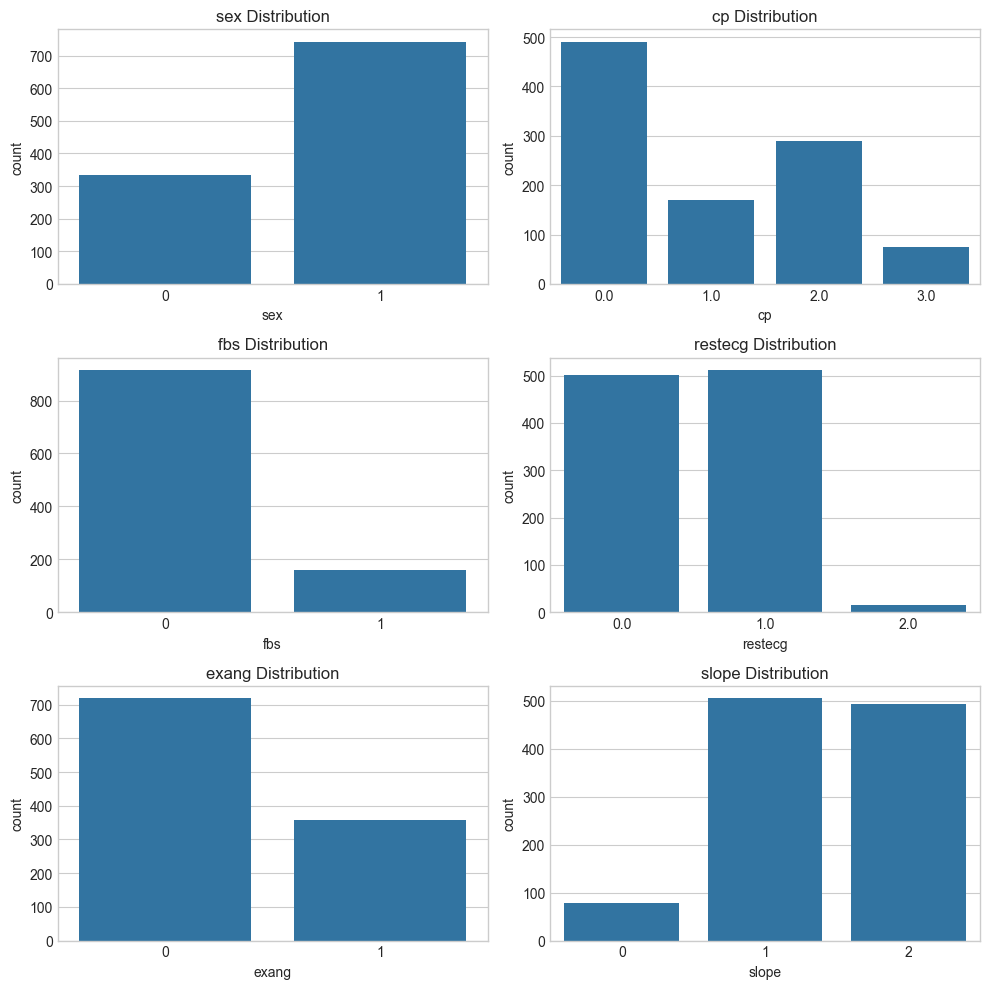

In [45]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for ax, col in zip(axes.flat, categorical_cols):
    sns.countplot(data=heart_disease_df, x=col, ax=ax)
    ax.set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

## 10. Relationship With Target (Important)

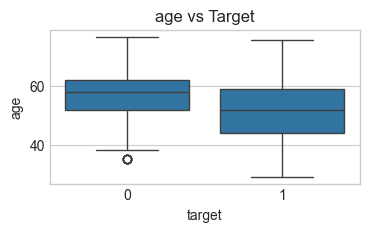

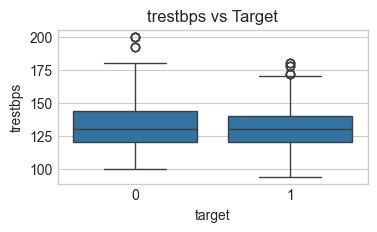

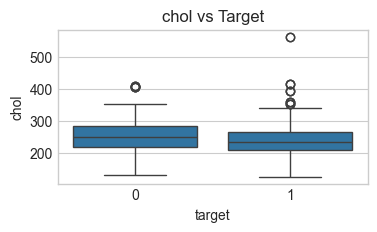

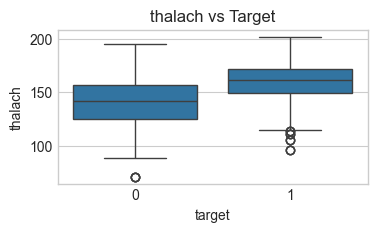

In [39]:
# Numeric vs target
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(data=heart_disease_df, x="target", y=col)
    plt.title(f"{col} vs Target")
    plt.show()

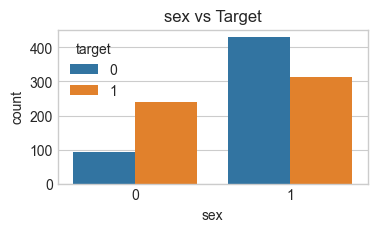

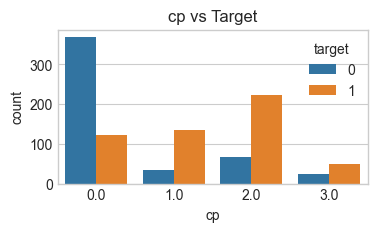

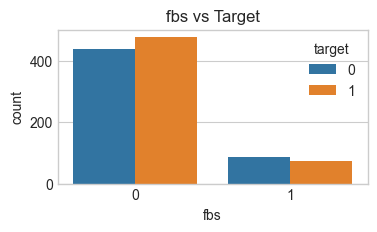

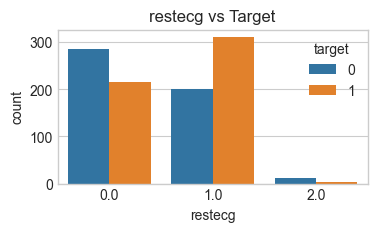

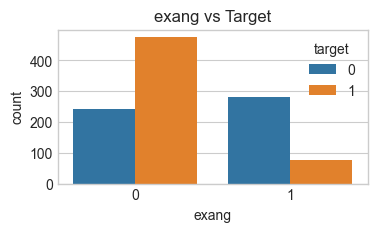

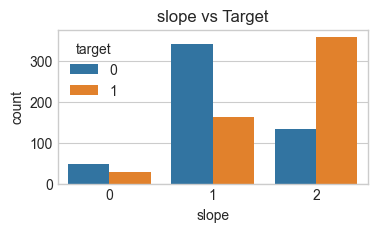

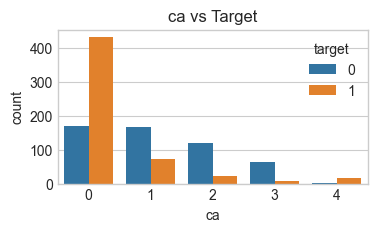

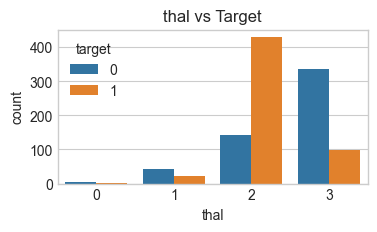

In [40]:
# Categorical vs target
for col in categorical_cols:
    plt.figure(figsize=(4,2))
    sns.countplot(data=heart_disease_df, x=col, hue="target")
    plt.title(f"{col} vs Target")
    plt.show()